In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential ,Model
import pathlib
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import PIL
import pathlib
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from sklearn.metrics import accuracy_score

In [ ]:
# Directory setup
sneaker_path = pathlib.Path("/content/drive/MyDrive/WALMART/sneakers")
bag_path = pathlib.Path("/content/drive/MyDrive/WALMART/handbags")

In [ ]:

# Parameters
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

# Image Data Generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Splitting 20% for validation
)

# Train Generator (80% of the data)
train_generator = datagen.flow_from_directory(
    "/content/drive/MyDrive/WALMART/",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

# Validation Generator (20% of the data)
validation_generator = datagen.flow_from_directory(
    "/content/drive/MyDrive/WALMART/",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Test Generator (Separate from validation, splitting 50% of validation for testing)
test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1  # Additional 10% from original data used for testing
)

test_generator = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/WALMART/",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 185 images belonging to 2 classes.
Found 46 images belonging to 2 classes.
Found 23 images belonging to 2 classes.


In [ ]:
# CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Model Summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.5809 - loss: 0.8522 - val_accuracy: 0.7826 - val_loss: 0.5148
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.7565 - loss: 0.5456 - val_accuracy: 0.7826 - val_loss: 0.4768
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.7886 - loss: 0.4518 - val_accuracy: 0.7826 - val_loss: 0.4813
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.7745 - loss: 0.4713 - val_accuracy: 0.7826 - val_loss: 0.3594
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.7633 - loss: 0.3838 - val_accuracy: 0.8261 - val_loss: 0.2562
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.8836 - loss: 0.3106 - val_accuracy: 0.9130 - val_loss: 0.2198
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9229 - loss: 0.2034 - val_accuracy: 0.9348 - val_loss: 0.1900
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.9506 - loss: 0.1910 - val_accuracy: 0.8261 - val_loss: 0.2628
Epoch 9/10


In [ ]:
# Save the model
model.save('sneaker_vs_bag_classifier.h5')

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8696 - loss: 0.3037   
Test accuracy: 86.96%


In [ ]:
from tensorflow.keras.preprocessing import image

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step


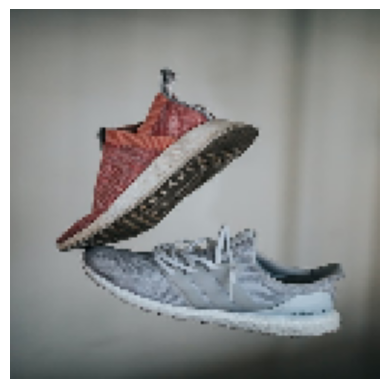

True label: Sneaker
Predicted label: Sneaker (Confidence: 1.00)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def predict_image_from_generator(generator):
    # Get one batch of images and labels
    images, labels = next(generator)
    # Take the first image from the batch
    img = images[0]
    true_label = np.argmax(labels[0]) + 1  # Convert one-hot encoded label to class number

    # Predict the label
    img_array = np.expand_dims(img, axis=0)  # Expand to a batch of size 1
    prediction = model.predict(img_array)

    # Determine predicted class
    predicted_class_index = np.argmax(prediction[0])
    predicted_class = predicted_class_index + 1  # Map to class number (1 or 2)
    confidence = np.max(prediction[0])

    # Map index to class names
    class_names = {1: 'Sneaker', 2: 'Handbag'}

    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Print results
    print(f"True label: {class_names[true_label]}")
    print(f"Predicted label: {class_names[predicted_class]} (Confidence: {confidence:.2f})")

# Test the prediction function with a sample image from the validation set
predict_image_from_generator(validation_generator)
